In [1]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf

In [2]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 668.3 MB 575 kB/s
     |████████████████████████████████| 462 kB 11.5 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/5000_dataset_terbaru.csv')
df.head()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0
1,gua sange gatel yah tetek memeknya di ranjang ...,1,0,0,0,0
2,pertama kali denger lagunya enak bangitu in da...,0,0,0,0,1
3,astajim ini pasti yang kasih penghargaan ke ib...,0,1,0,1,0
4,kalo keberagamannya ada tapi ga dianggep banya...,0,0,0,0,1


In [4]:
df.tail()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
4995,gay bogor,0,0,0,1,0
4996,Bogor memang cantik . Terima kasih dari Austra...,0,0,0,0,1
4997,Lu mati gue party coy,0,0,0,1,0
4998,Aku punya peliharaan yang imut banget ada anji...,0,0,0,0,1
4999,Anjing muka kayak kuda gitu ngeharepin dapet g...,0,0,0,1,0


In [5]:
df.iloc[0:1,]

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0


In [6]:
df.iloc[0]['original_text']

'BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUKU MEREKA dan lain lain ITU sudah SaNGAT jelas SaYa HERAN SaMa RaKYAT YanG MASIH TOLOL Udah Jelas ADA NIAT DaRi HTI YanG INGIN TEGAKKAN KHILAFAH dan GANTI NKRI MASIH NGELES GAK ADA LAH MAU TEGAKKAN KHILAFAH AJA MUNAFIK APANYA KHILAFAH'

In [7]:
df[df.columns[1:]].iloc[0:3]

,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,0,0,1,1,0
1,1,0,0,0,0
2,0,0,0,0,1


In [8]:
from tensorflow.keras.layers import TextVectorization
a = df['original_text']
b = df[df.columns[1:]].values


In [9]:
df.columns

Index(['original_text', 'pornografi', 'sara', 'radikalisme',
       'pencemaran_nama_baik', 'non_toxic'],
      dtype='object')

In [10]:
df.dtypes

original_text           object
pornografi               int64
sara                     int64
radikalisme              int64
pencemaran_nama_baik     int64
non_toxic                int64
dtype: object

In [11]:
# Change text to lowercase
def proses_data(text):
    newText = text.lower()
    return newText
# ini case kalau semua mau ngerun semua data Komputerku kentang maka ngefreeze)
# dataset['original_text'].apply(lambda x: print(x))
# ini case kalau semua mau ngerun 5 data pertama
data = df['original_text']
data = data.apply(lambda x: proses_data(x))
data.head()

0    bukan cuma spanduk prof video orasi mereka buk...
1    gua sange gatel yah tetek memeknya di ranjang ...
2    pertama kali denger lagunya enak bangitu in da...
3    astajim ini pasti yang kasih penghargaan ke ib...
4    kalo keberagamannya ada tapi ga dianggep banya...
Name: original_text, dtype: object

In [12]:
# menghilangkan link dan tag html yang kemungkinan masih ada di dataset
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
data = data.apply(lambda x: link_remover(x))

# menghilangkan tanda baca dan karakter spesial
def karakter_spesial(text):
    newText = re.sub('[^a-zA-Z0-9\s]', ' ', text)
    return newText
data = data.apply(lambda x: karakter_spesial(x))

# menghilangkan spasi berlebihan
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
data = data.apply(lambda x: Spasi_berlebihan(x))

data.head()

0    bukan cuma spanduk prof video orasi mereka buk...
1    gua sange gatel yah tetek memeknya di ranjang ...
2    pertama kali denger lagunya enak bangitu in da...
3    astajim ini pasti yang kasih penghargaan ke ib...
4    kalo keberagamannya ada tapi ga dianggep banya...
Name: original_text, dtype: object

In [13]:
# df[df.columns[1:]].values

In [14]:
MAX_WORD = 20000
MAX_SEQ = 1000

In [15]:
data = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')

In [16]:
data.adapt(a.values)

In [17]:
data('anjing kadal')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 139, 3265])>

In [18]:
data.get_vocabulary()

['',
 '[UNK]',
 'yang',
 'dan',
 'di',
 'itu',
 'ini',
 'orang',
 'ada',
 'dari',
 'ya',
 'dengan',
 'jadi',
 'ga',
 'gak',
 'presiden',
 'tapi',
 'juga',
 'bisa',
 'aja',
 'sama',
 'tidak',
 'untuk',
 'saya',
 'jokowi',
 'gue',
 'ke',
 'kalo',
 'lagi',
 'mau',
 'apa',
 'aku',
 'agama',
 'dia',
 'lu',
 'nya',
 'islam',
 'indonesia',
 'kita',
 'karena',
 'kalau',
 'mereka',
 'sudah',
 'jangan',
 'bukan',
 'udah',
 'lo',
 'dalam',
 'akan',
 'lain',
 'lebih',
 'kafir',
 'pada',
 'banyak',
 'semua',
 'pak',
 'asing',
 'masih',
 'kok',
 'si',
 'gitu',
 'cina',
 'buat',
 'adalah',
 'kan',
 'atau',
 'punya',
 'anak',
 'cebong',
 'tak',
 'negara',
 'cuma',
 'sekarang',
 'sih',
 'lah',
 'seperti',
 'kamu',
 'terus',
 'tau',
 'ganti',
 'baru',
 'rakyat',
 'harus',
 'allah',
 'kristen',
 'saja',
 'ahok',
 'mana',
 'kontol',
 'hanya',
 'emang',
 'salah',
 'sendiri',
 'dulu',
 'memang',
 'kayak',
 'gua',
 'banget',
 'oleh',
 'muslim',
 'hari',
 'begitu',
 'tahun',
 'siapa',
 'kenapa',
 'baik',
 'me

In [19]:
# download array_data as .txt
# with open("./data_tokenized_word_anticede.txt", "w") as output:
    # output.write(str(column(array_data, 0)))

In [20]:
kalimat_text = data(a.values)

In [21]:
len(a)

5000

In [22]:
kalimat_text

<tf.Tensor: shape=(5000, 1000), dtype=int64, numpy=
array([[   44,    71,  1493, ...,     0,     0,     0],
       [   96,   365, 12296, ...,     0,     0,     0],
       [  392,   150,  1146, ...,     0,     0,     0],
       ...,
       [   34,   245,    25, ...,     0,     0,     0],
       [   31,    66,  5255, ...,     0,     0,     0],
       [  139,   443,    95, ...,     0,     0,     0]])>

In [23]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(5000)
dataset = dataset.batch(20)

In [24]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [25]:
batch_b.shape

(20, 5)

In [26]:
train = dataset.take(int(len(dataset)*.8))
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [27]:
train.as_numpy_iterator().next()

(array([[   22,    30,   705, ...,     0,     0,     0],
        [ 4561,  4576,   234, ...,     0,     0,     0],
        [    3,    52,   939, ...,     0,     0,     0],
        ...,
        [  917,   122,   376, ...,     0,     0,     0],
        [  940,  2969, 13795, ...,     0,     0,     0],
        [    6,   125,   703, ...,     0,     0,     0]]),
 array([[0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]]))

In [28]:
validation.as_numpy_iterator().next()

(array([[3058, 3178,   82, ...,    0,    0,    0],
        [  58,  568,  971, ...,    0,    0,    0],
        [  62,   30, 1195, ...,    0,    0,    0],
        ...,
        [  25,   80,   19, ...,    0,    0,    0],
        [4812,   21, 3933, ...,    0,    0,    0],
        [ 106,  183,    4, ...,    0,    0,    0]]), array([[0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0]]))

In [29]:
test.as_numpy_iterator().next()

(array([[ 1252,    71,   652, ...,     0,     0,     0],
        [  716,     6,   643, ...,     0,     0,     0],
        [ 1522,     2,  2183, ...,     0,     0,     0],
        ...,
        [ 1427,   976,   541, ...,     0,     0,     0],
        [    7,  1334,  5809, ...,     0,     0,     0],
        [11846,  8074,   107, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1]]))

In [30]:
b[0]

array([0, 0, 1, 1, 0])

In [31]:
#make a model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(Bidirectional(LSTM(32, activation='tanh',)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400020    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               13568     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                        

In [32]:
EPOCHS = 10
history = model.fit(train, epochs=EPOCHS, validation_data=validation)

Epoch 1/10
200/200 [==============================] - 108s 523ms/step - loss: 0.4814 - accuracy: 0.3375 - val_loss: 0.4358 - val_accuracy: 0.4200
Epoch 2/10
200/200 [==============================] - 91s 455ms/step - loss: 0.3718 - accuracy: 0.5305 - val_loss: 0.2622 - val_accuracy: 0.6950
Epoch 3/10
200/200 [==============================] - 95s 474ms/step - loss: 0.2532 - accuracy: 0.6910 - val_loss: 0.1844 - val_accuracy: 0.7520
Epoch 4/10
200/200 [==============================] - 94s 473ms/step - loss: 0.1829 - accuracy: 0.7645 - val_loss: 0.1513 - val_accuracy: 0.7890
Epoch 5/10
200/200 [==============================] - 95s 474ms/step - loss: 0.1406 - accuracy: 0.7968 - val_loss: 0.0975 - val_accuracy: 0.8090
Epoch 6/10
200/200 [==============================] - 94s 468ms/step - loss: 0.1091 - accuracy: 0.8240 - val_loss: 0.0837 - val_accuracy: 0.8550
Epoch 7/10
200/200 [==============================] - 93s 467ms/step - loss: 0.0862 - accuracy: 0.8462 - val_loss: 0.0830 - val_a

In [33]:
history.history

{'accuracy': [0.3375000059604645,
  0.5304999947547913,
  0.6909999847412109,
  0.7645000219345093,
  0.796750009059906,
  0.8240000009536743,
  0.8462499976158142,
  0.8587499856948853,
  0.875249981880188,
  0.8880000114440918],
 'loss': [0.48144644498825073,
  0.37175261974334717,
  0.25316405296325684,
  0.18293413519859314,
  0.14064235985279083,
  0.10905352234840393,
  0.08621367067098618,
  0.07489744573831558,
  0.06744122505187988,
  0.05204790085554123],
 'val_accuracy': [0.41999998688697815,
  0.6949999928474426,
  0.7519999742507935,
  0.7889999747276306,
  0.8090000152587891,
  0.8550000190734863,
  0.8140000104904175,
  0.859000027179718,
  0.9089999794960022,
  0.8730000257492065],
 'val_loss': [0.4358457028865814,
  0.26215121150016785,
  0.18441151082515717,
  0.15131080150604248,
  0.09749389439821243,
  0.08369037508964539,
  0.08300445228815079,
  0.060608264058828354,
  0.05026449263095856,
  0.038801226764917374]}

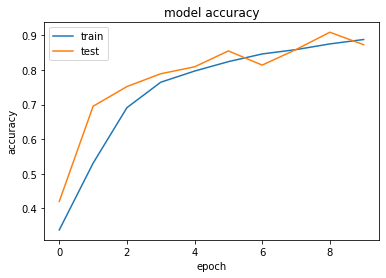

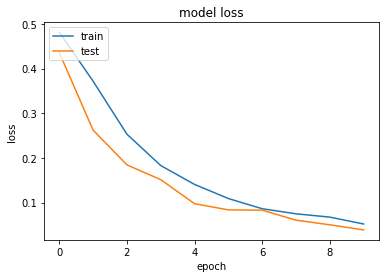

In [34]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
batch_c = test.as_numpy_iterator().next()

In [91]:
masukan_text = data('muka lu kayak monyet')

In [92]:
model.predict(np.expand_dims(masukan_text,0))

array([[3.5917534e-08, 5.8052244e-08, 1.7178878e-06, 9.9960536e-01,
        7.3987842e-03]], dtype=float32)

In [93]:
# save model in h5 format
# model.save('anticede_model.h5')

In [94]:
# convert file ke format .pb
# import os

# model_version = "1"
# model_save = "anticede"
# model_path = os.path.join(model_save, model_version)
# tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: anticede/1/assets


INFO:tensorflow:Assets written to: anticede/1/assets


In [95]:
# !zip -r log.zip log /content/anticede

	zip warning: name not matched: log
  adding: content/anticede/ (stored 0%)
  adding: content/anticede/1/ (stored 0%)
  adding: content/anticede/1/variables/ (stored 0%)
  adding: content/anticede/1/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: content/anticede/1/variables/variables.index (deflated 68%)
  adding: content/anticede/1/assets/ (stored 0%)
  adding: content/anticede/1/saved_model.pb (deflated 90%)


In [41]:
# !ls -l {model_path}

In [42]:
# menampilkan saved model
# !saved_model_cli show --dir {model_path} --all

In [43]:
# !echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
# !apt update

In [44]:
# !apt-get install tensorflow-model-server

In [45]:
# os.environ['model_save'] = model_save

In [46]:
# %%bash --bg 
# nohup tensorflow_model_server \
  # --rest_api_port=8501 \
  # --model_name=anticede_01 \
  # --model_base_path="${model_path}" >server.log 2>&1
  # --model_base_path="${model_path}" >server.log 2>&1

In [47]:
# !tail server.log